In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from scipy.sparse import csr_matrix

EDA

In [2]:
train = pd.read_csv('mnist_train.csv')
print(train.info())
print("\n Shape of the dataset:", train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB
None

 Shape of the dataset: (60000, 785)


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


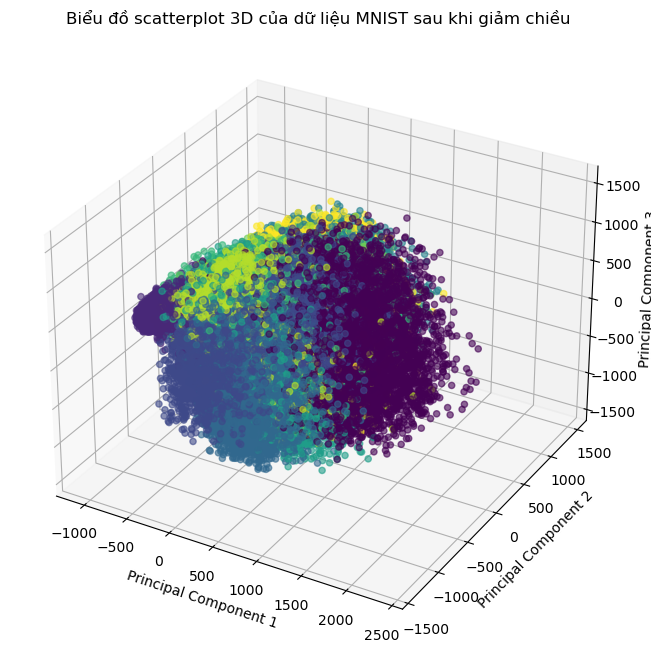

In [32]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Đọc dữ liệu từ tập tin CSV
train = pd.read_csv('mnist_train.csv')

# Lấy features và labels
X = train.drop('label', axis=1)
y = train['label']

# Giảm chiều dữ liệu xuống 3 chiều bằng PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Tạo DataFrame mới từ dữ liệu giảm chiều
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])
pca_df['Label'] = y

# Vẽ scatterplot 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis', alpha=0.6)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('Biểu đồ scatterplot 3D của dữ liệu MNIST sau khi giảm chiều')
plt.show()


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [39]:
nan = train.isna().sum()
print(nan[nan != 0])

Series([], dtype: int64)


=> No missing values

In [35]:
def display_digits(N, data):
    train = data
    images = np.random.randint(low=0, high=59999, size=N).tolist()
    
    subset_images = train.iloc[images,:]
    subset_images.index = range(1, N+1)
    # print("Handwritten picked-up digits: ", subset_images['label'].values)
    subset_images.drop(columns=['label'], inplace=True)

    for i, row in subset_images.iterrows():
        plt.subplot((N//8)+1, 8, i)
        pixels = row.values.reshape((28,28))
        plt.imshow(pixels, cmap='gray')
        plt.xticks([])
        plt.yticks([])
    plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_8940\1890072716.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_images.drop(columns=['label'], inplace=True)


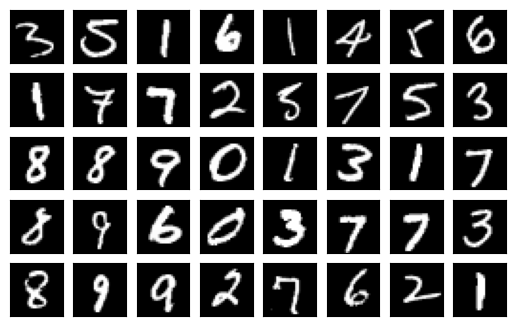

In [36]:
display_digits(40, train)

In [7]:
subset_pixels = train.iloc[:, 1:]
subset_pixels.describe()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [46]:
import pandas as pd
attributes_with_constant_value = (subset_pixels.max() == subset_pixels.min())
total_attributes_with_constant_value = attributes_with_constant_value.sum()

print("Tổng số lượng thuộc tính luôn nhận giá trị 0 hoặc 255:", total_attributes_with_constant_value)
print("Thuộc tính luôn nhận giá trị 0 hoặc 255:")
print(attributes_with_constant_value[attributes_with_constant_value].index)


Tổng số lượng thuộc tính luôn nhận giá trị 0 hoặc 255: 67
Thuộc tính luôn nhận giá trị 0 hoặc 255:
Index(['1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9', '1x10',
       '1x11', '1x12', '1x17', '1x18', '1x19', '1x20', '1x21', '1x22', '1x23',
       '1x24', '1x25', '1x26', '1x27', '1x28', '2x1', '2x2', '2x3', '2x4',
       '2x25', '2x26', '2x27', '2x28', '3x1', '3x2', '3x27', '3x28', '4x1',
       '4x2', '4x28', '5x1', '6x1', '6x2', '7x1', '18x1', '21x1', '24x1',
       '24x2', '24x28', '25x1', '25x2', '25x28', '26x1', '26x2', '26x28',
       '27x1', '27x2', '27x3', '27x27', '27x28', '28x1', '28x2', '28x3',
       '28x4', '28x25', '28x26', '28x27', '28x28'],
      dtype='object')


ta có thể nhận thấy nhiều pixel luôn nhận giá trị 0 hoặc 255

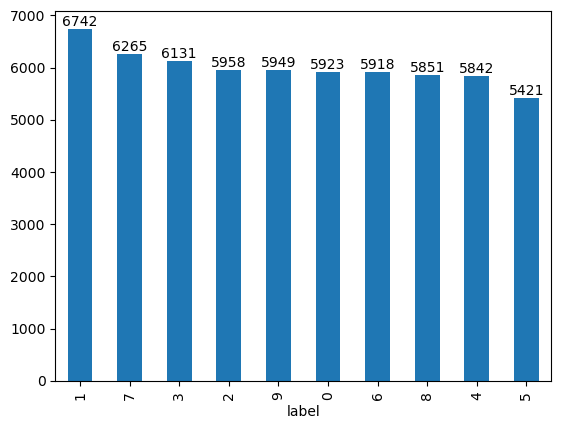

In [9]:
value_counts = train['label'].value_counts()

# Vẽ biểu đồ cột
_ = value_counts.plot(kind='bar')

# Thêm chú thích (annotations) trên đầu mỗi cột
for i, value in enumerate(value_counts):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Hiển thị biểu đồ
plt.show()

In [47]:
def remove_constant_pixels(train_dt, test_dt):
    changing_train_dt = train_dt.loc[:]
    changing_test_dt = test_dt.loc[:]
    
    dropped_pixels = []
    for col in train_dt:
        if changing_train_dt[col].max() == 0 or changing_train_dt[col].min() == 255:
            changing_train_dt.drop(columns=[col], inplace=True)
            changing_test_dt.drop(columns=[col], inplace=True)
            dropped_pixels.append(col)
    # print("Constantly black pixels that have been dropped: {}".format(dropped_pixels_b))
    # print("\n Constantly white pixels that have been dropped: {}".format(dropped_pixels_b))

    print("Remaining pixels: {}".format(len(changing_train_dt.columns)))
    print("Pixels removed: {}".format(784-len(changing_train_dt.columns)))
    
    return changing_train_dt, changing_test_dt, dropped_pixels

In [48]:
train_dt = pd.read_csv('mnist_train.csv')
X_train = train_dt.drop(columns=['label'])

test_dt = pd.read_csv("mnist_test.csv")
X_test = test_dt.drop('label', axis=1)

In [45]:
X_train.describe()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [49]:
X_train_changing, X_test_changing, _ = remove_constant_pixels(X_train, X_test)

print(f"Remaining pixels in train data: {len(X_train_changing.columns)}")
print(f"Remaining pixels in test data: {len(X_test_changing.columns)}")

Remaining pixels: 717
Pixels removed: 67
Remaining pixels in train data: 717
Remaining pixels in test data: 717


In [20]:
import os
import math
import time
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA


class NaiveBayes:
    def __init__(self):
        self.train_datas, self.train_labels, self.test_datas, self.test_labels = (
            [],
            [],
            [],
            [],
        )
        self.prior, self.likelihoods, self.confusionMatrix = [], [], []
        self.start, self.end, self.time_use = 0, 0, 0
        self.features = 0
        self.train_records = 0
        self.test_records = 0
        self.num_classes = 0
        self.features = 0
        self.feature_values = 256

    def init(self, X_train, y_train, X_test, y_test):
        self.train_labels = y_train
        self.train_datas = X_train

        self.test_labels = y_test
        self.test_datas = X_test

        self.train_records, self.features = self.train_datas.shape
        self.test_records = len(self.test_datas)

        self.num_classes = len(np.unique(self.train_labels))

        self.confusionMatrix = [[0] * self.num_classes for _ in range(self.num_classes)]

    def run(self):
        self.start = time.time()
        self.train()
        self.predict_logarit()
        self.end = time.time()
        self.time_use = self.end - self.start
        print(self.time_use)

    def assess(self):
        self.CM()

    def train(self):
        # Priori Probability
        self.prior = [0] * self.num_classes

        for label in self.train_labels:
            self.prior[label] += 1

        for i in range(self.num_classes):
            self.prior[i] /= self.train_records
            # print(f"priori Probability of {i}: ", self.prior[i])

        # Posterior Probability
        self.likelihoods = [
            [[0] * self.feature_values for _ in range(self.features)]
            for _ in range(self.num_classes)
        ]
        class_counts = [0] * self.num_classes

        for i in range(self.train_records):
            label = self.train_labels[i]
            for j in range(self.features):
                index = int(self.train_datas[i][j])
                self.likelihoods[label][j][index] += 1
            class_counts[label] += 1

        for i in range(self.num_classes):
            for j in range(self.features):
                for k in range(self.feature_values):
                    if self.likelihoods[i][j][k] == 0:
                        self.likelihoods[i][j][k] = 1e-7
                    else:
                        self.likelihoods[i][j][k] /= class_counts[i]

    def predict_logarit(self):
        correct = 0
        sum_errors = 0

        for i in range(self.test_records):
            max_prob = -float("inf")
            max_class = -1

            for j in range(self.num_classes):
                prob = math.log(self.prior[j])
                for k in range(self.features):
                    index = int(self.test_datas[i][k])
                    prob += math.log(self.likelihoods[j][k][index])

                if prob > max_prob:
                    max_prob = prob
                    max_class = j

            self.confusionMatrix[self.test_labels[i]][max_class] += 1

            if max_class == self.test_labels[i]:
                correct += 1
            else:
                sum_errors += 1

        print()
        print("so ket qua sai:", sum_errors)
        print("so ket qua dung:", correct)
        accuracy = correct / (sum_errors + correct)
        print("Accuracy:", accuracy)

    def CM(self):
        print("Ground Truth = GT")
        print("Predicted Label = PL")
        self.printLine()
        print(f"total= {self.test_records:3d}|", end="")
        for i in range(self.num_classes):
            print(f" PL = {i:2d} |", end="")
        print()
        self.printLine()

        for i in range(self.num_classes):
            print(f" GT = {i:2d}    |", end="")
            for j in range(self.num_classes):
                print(f"   {self.confusionMatrix[i][j]:4d}  |", end="")
            print()
            self.printLine()

    def printLine(self):
        print("------------|", end="")
        for _ in range(self.num_classes):
            print("---------|", end="")
        print()

In [21]:
NB = NaiveBayes()

In [31]:
# X_train_changing, X_test_changing
X_train = X_train_changing.values
y_train = train_dt.iloc[:,0].values

X_test = X_test_changing.values
y_test = test_dt.iloc[:,0].values

In [32]:
NB.init(X_train, y_train, X_test, y_test)

In [30]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

In [33]:
NB.run()
NB.CM()


so ket qua sai: 1607
so ket qua dung: 8393
Accuracy: 0.8393
142.70411086082458


In [34]:
NB.CM()

Ground Truth = GT
Predicted Label = PL
------------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
total= 10000| PL =  0 | PL =  1 | PL =  2 | PL =  3 | PL =  4 | PL =  5 | PL =  6 | PL =  7 | PL =  8 | PL =  9 |
------------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
 GT =  0    |    881  |      0  |      4  |      5  |      2  |     47  |     16  |      1  |     24  |      0  |
------------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
 GT =  1    |      0  |   1048  |     26  |      6  |      1  |     16  |      5  |      0  |     33  |      0  |
------------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
 GT =  2    |     16  |      4  |    866  |     42  |     15  |      5  |     26  |      7  |     50  |      1  |
------------|---------|---------|---------|------

In [13]:
from sklearn.decomposition import PCA

In [40]:
pca = PCA(n_components=0.95)
pca.fit(X_train_changing)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


PCA(n_components=0.95)

In [41]:
print(f"Total number of components used after PCA : {pca.n_components_}")

Total number of components used after PCA : 154


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
#To save time and not have to run the entire function
DROPPED_PIX = ['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 
               'pixel10', 'pixel11', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 
               'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 
               'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel82', 'pixel83', 'pixel84', 
               'pixel85', 'pixel111', 'pixel112', 'pixel139', 'pixel140', 'pixel141', 'pixel168', 'pixel196', 
               'pixel392', 'pixel420', 'pixel421', 'pixel448', 'pixel476', 'pixel532', 'pixel560', 'pixel644', 
               'pixel645', 'pixel671', 'pixel672', 'pixel673', 'pixel699', 'pixel700', 'pixel701', 'pixel727', 
               'pixel728', 'pixel729', 'pixel730', 'pixel731', 'pixel754', 'pixel755', 'pixel756', 'pixel757', 
               'pixel758', 'pixel759', 'pixel760', 'pixel780', 'pixel781', 'pixel782', 'pixel783']
train_changing_pixels_df = pd.read_csv('../input/changing-pixels/train_changing_pixels_DB.csv', index_col=0)
print(train_changing_pixels_df.head())
train = pd.read_csv('mnist_train.csv')
print(train.head())

In [16]:
from sklearn.decomposition import PCA

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


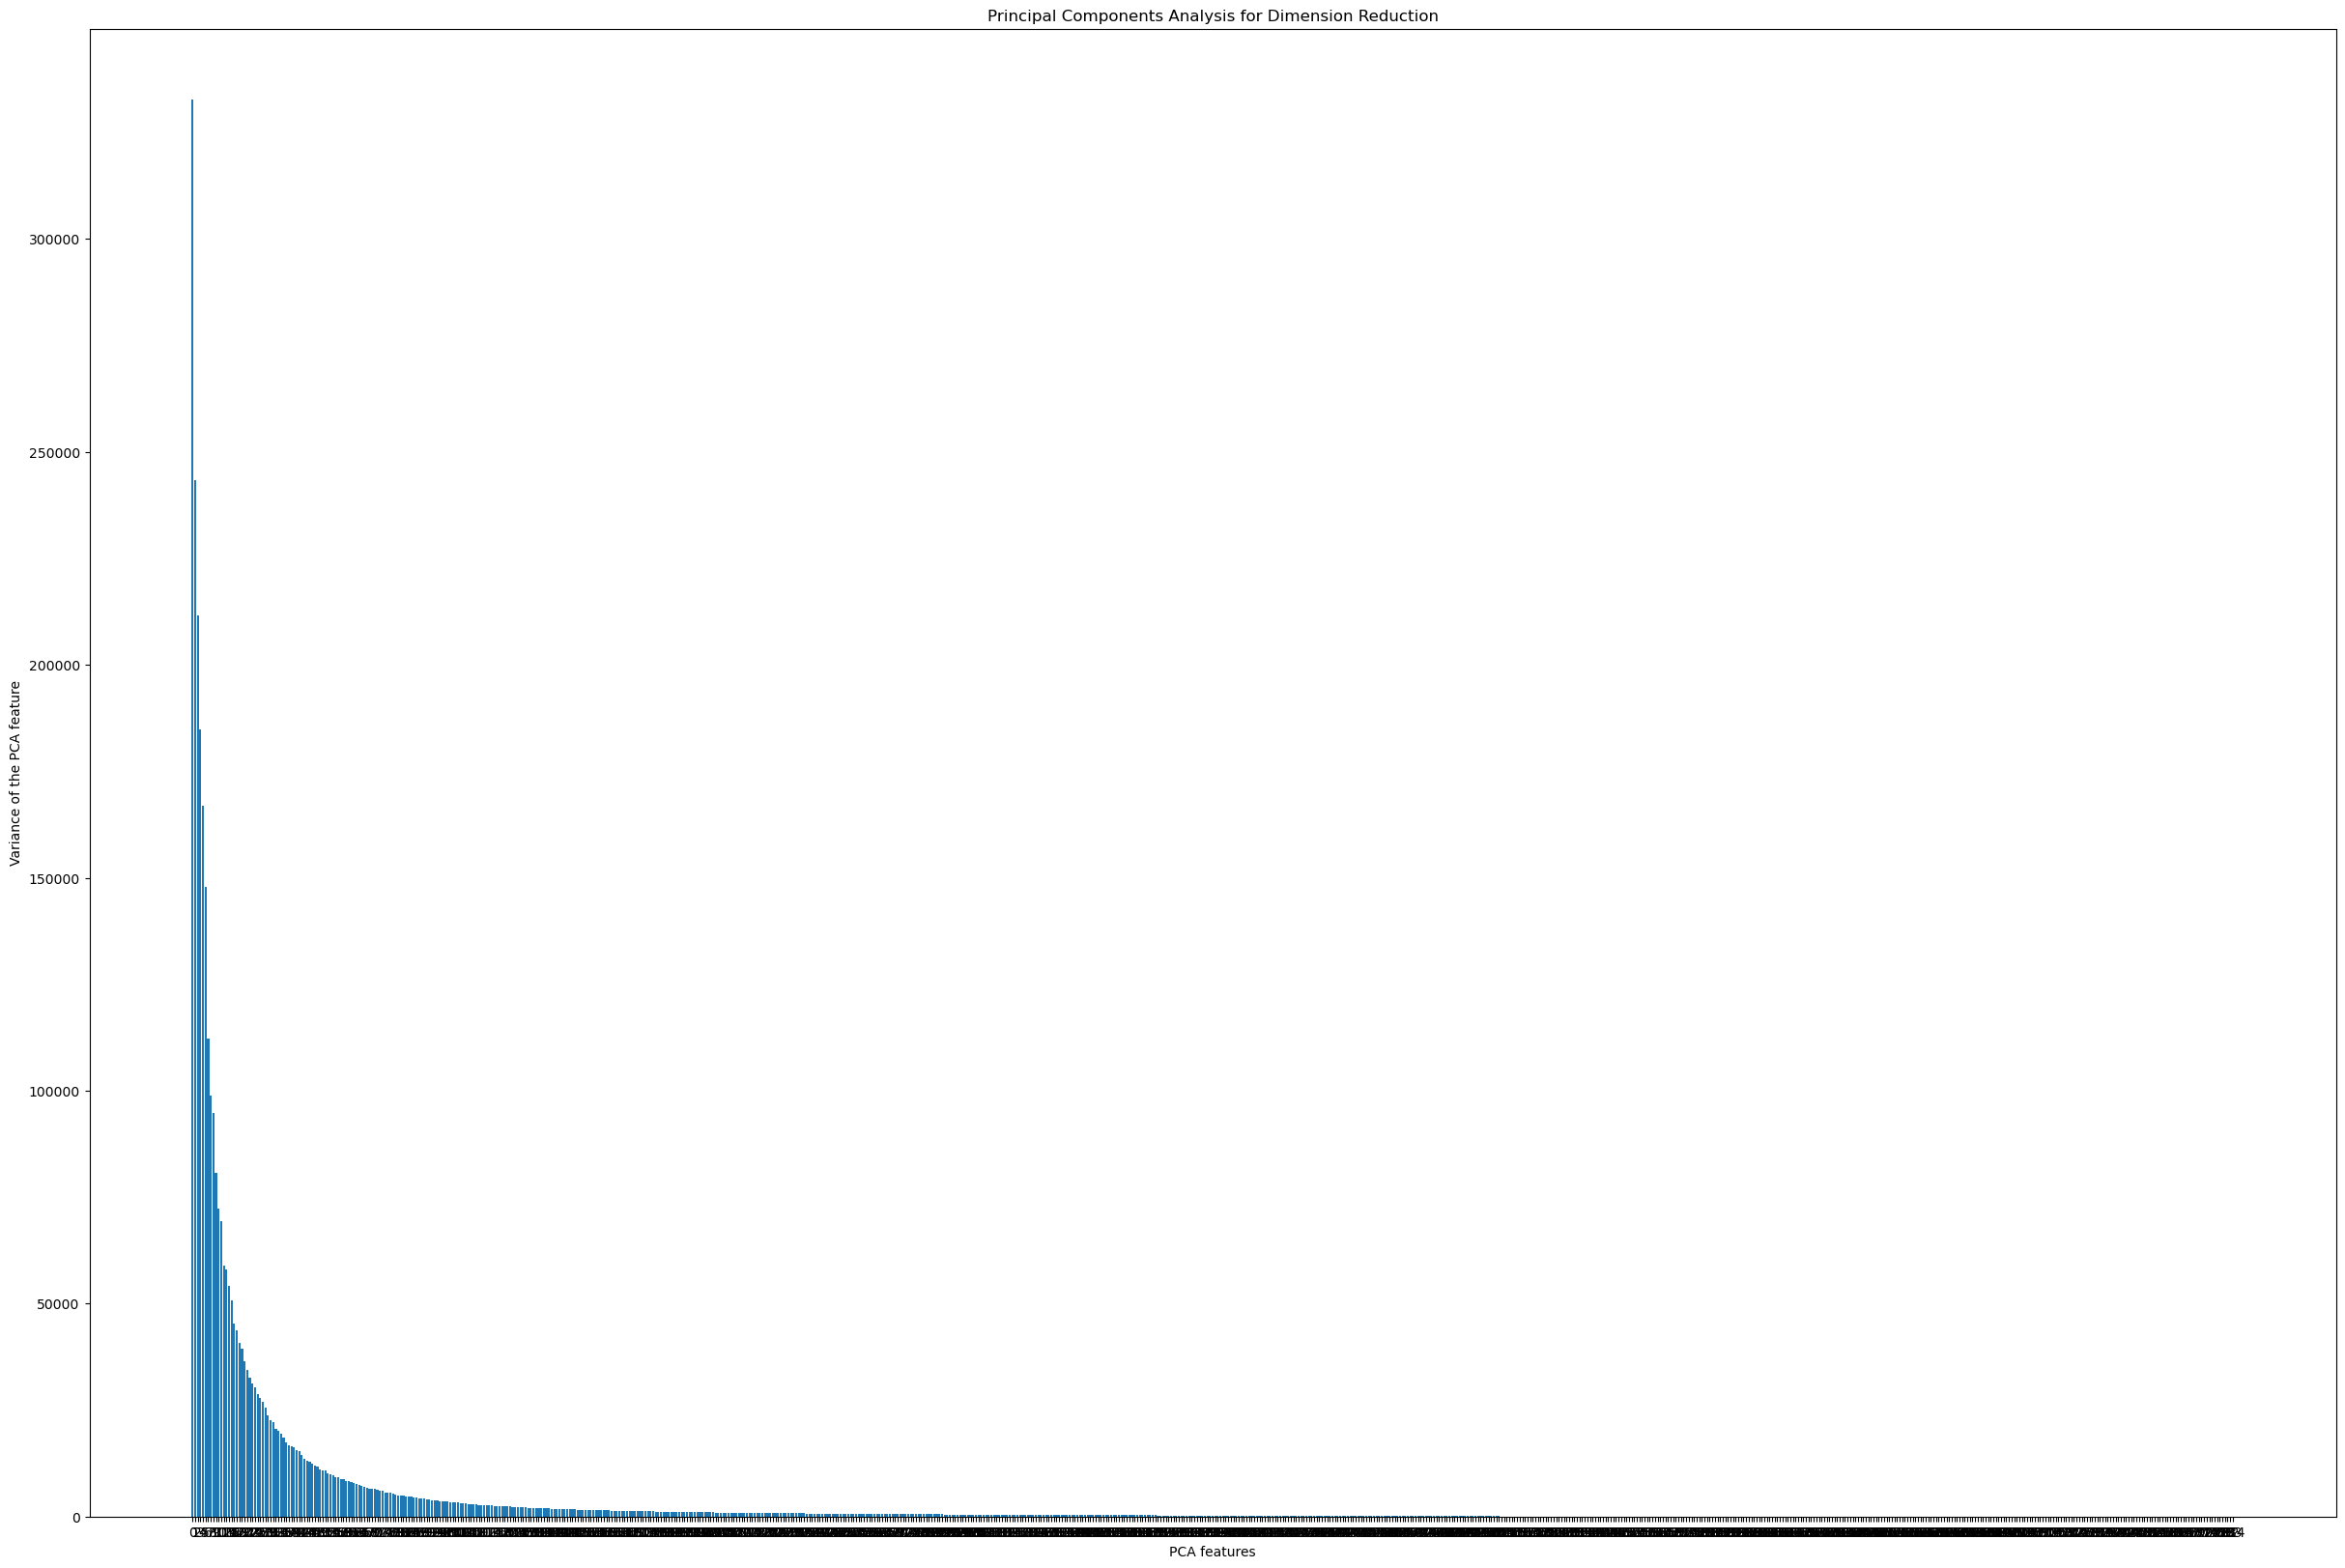

FileNotFoundError: [Errno 2] No such file or directory: 'visualizations/PCA features variance_zoom.png'

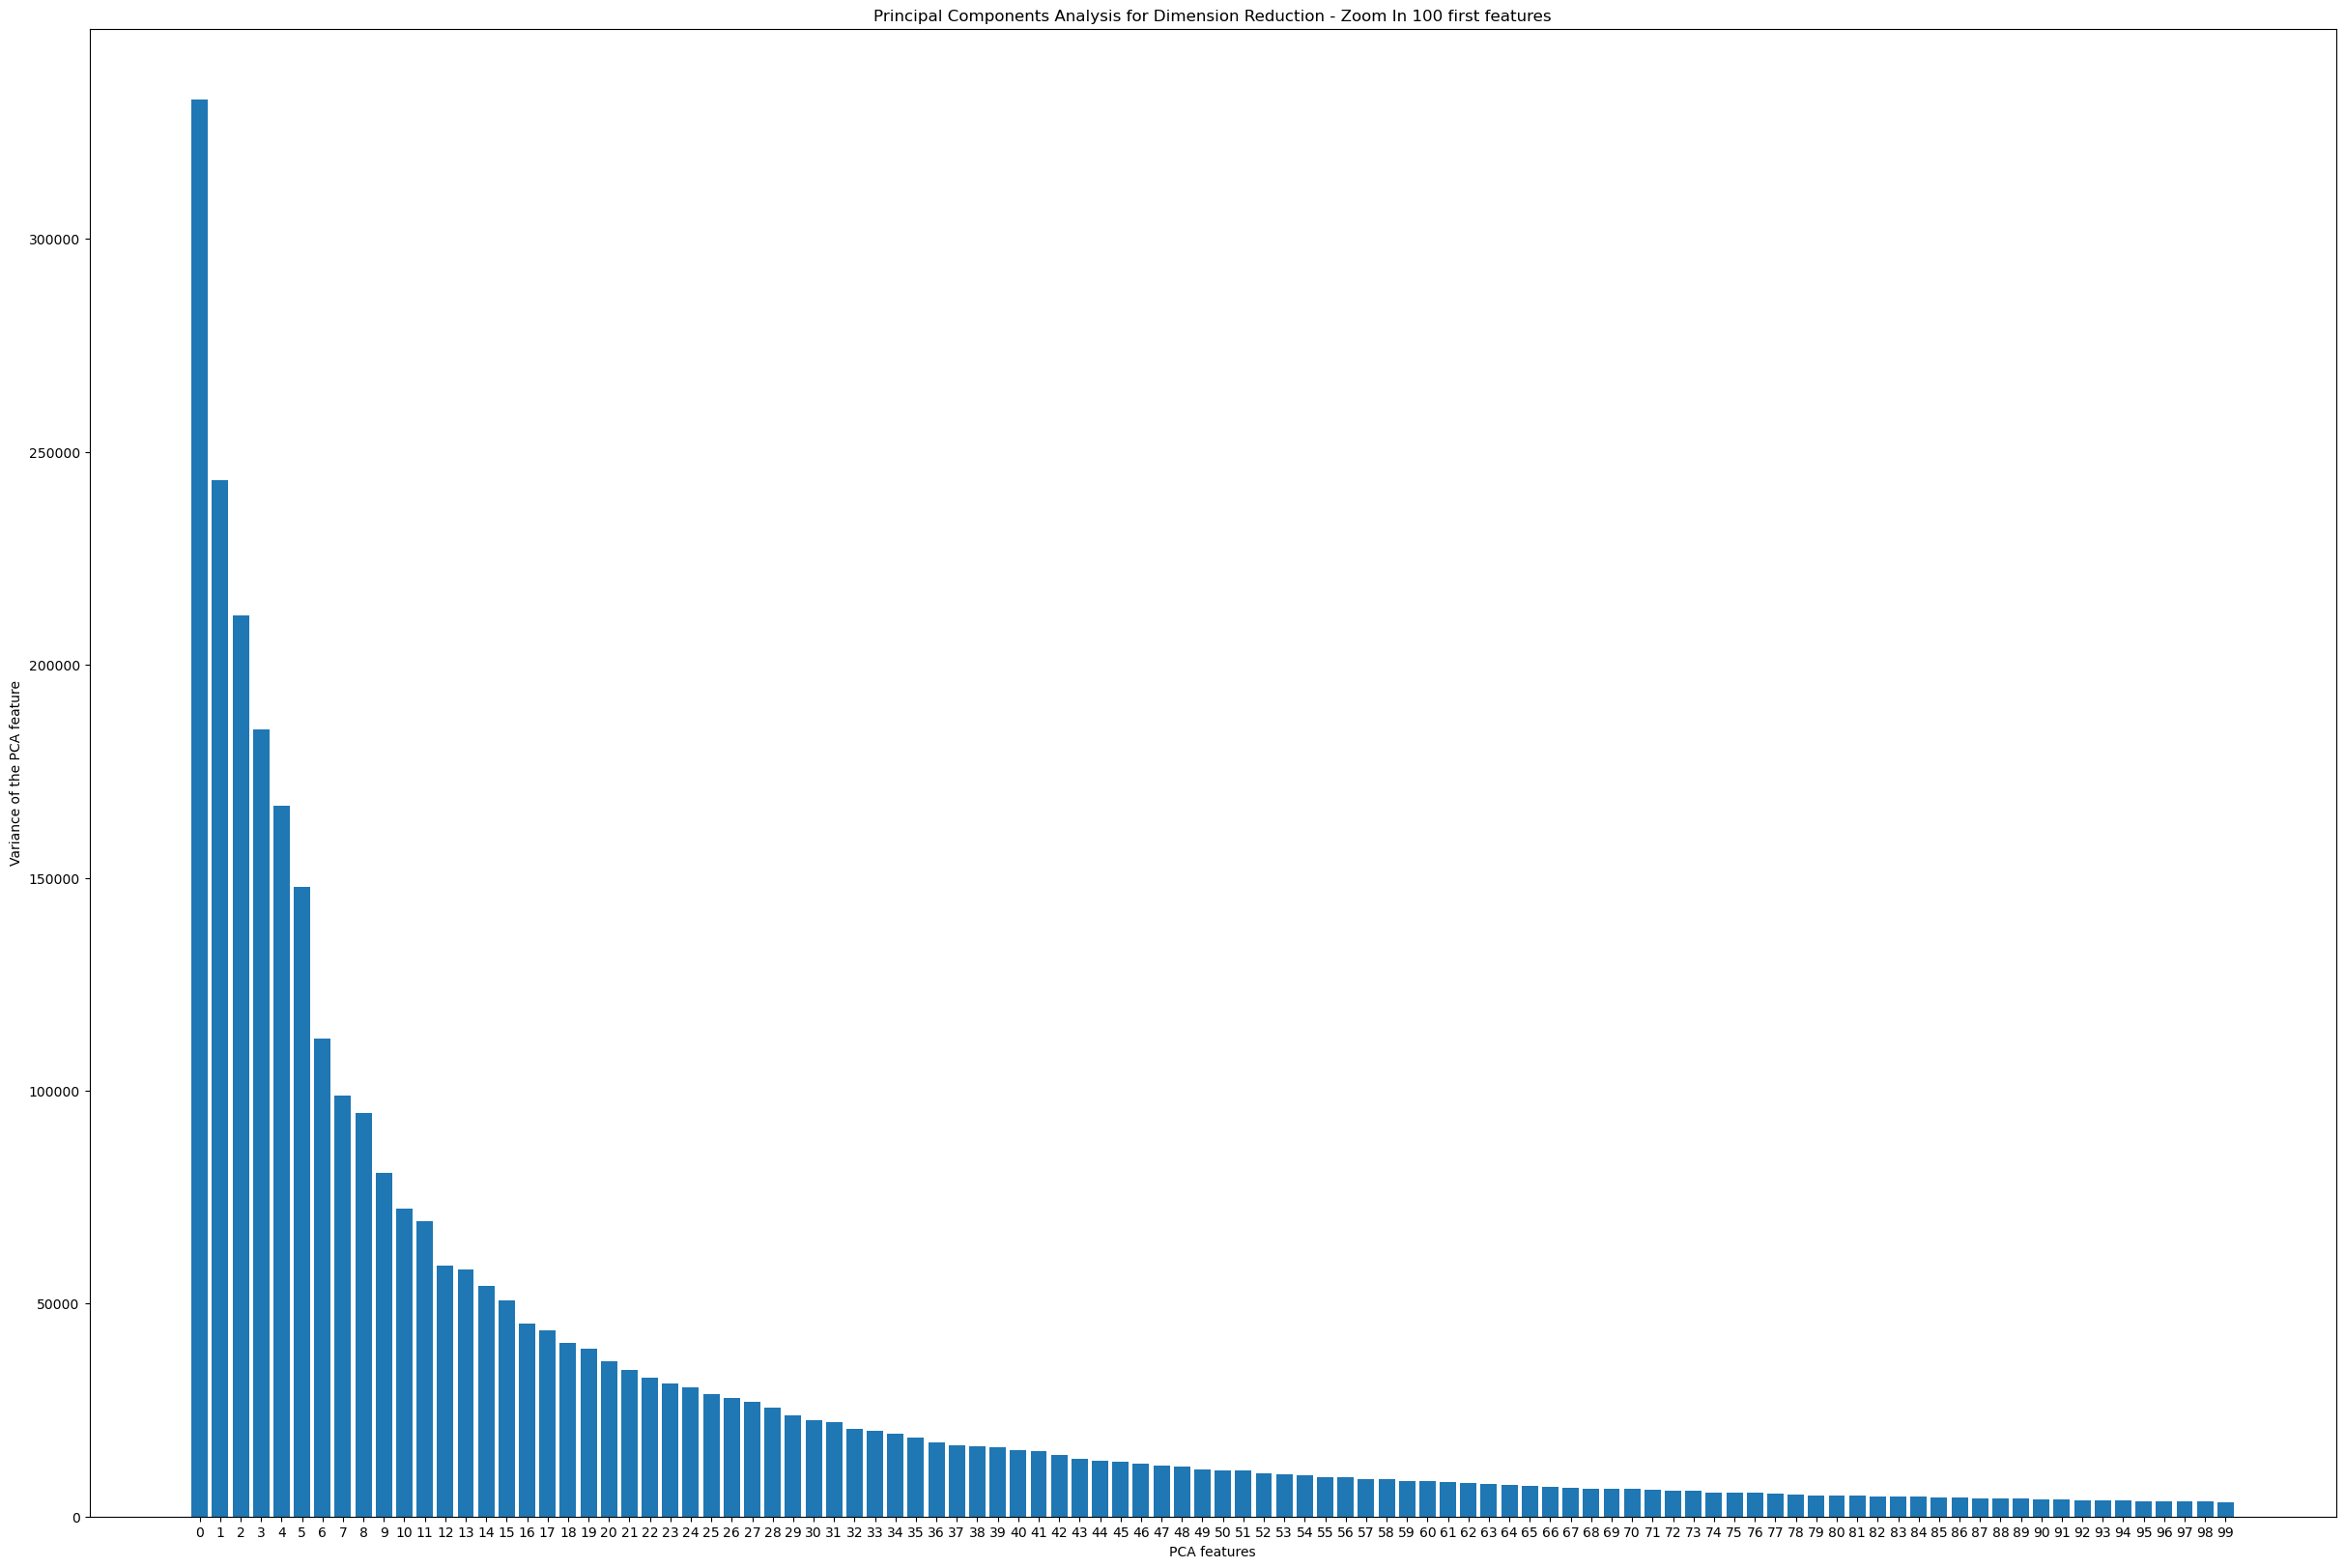

In [19]:
pca = PCA()
pca.fit(train)

#PCA features variance visualization
pca_features = range(pca.n_components_)
_ = plt.figure(figsize=(30,20))
_ = plt.bar(pca_features, pca.explained_variance_)
_ = plt.xticks(pca_features)
_ = plt.title('Principal Components Analysis for Dimension Reduction')
_ = plt.xlabel('PCA features')
_ = plt.ylabel('Variance of the PCA feature')
#_ = plt.savefig('visualizations/PCA features variance.png')
plt.show()

#PCA features variance visualization - ZOOM in
l= 100
x = range(l)
_ = plt.figure(figsize=(30,20))
_ = plt.bar(x, pca.explained_variance_[:l])
_ = plt.xticks(x)
_ = plt.title('Principal Components Analysis for Dimension Reduction - Zoom In {} first features'.format(l))
_ = plt.xlabel('PCA features')
_ = plt.ylabel('Variance of the PCA feature')
_ = plt.savefig('visualizations/PCA features variance_zoom.png')
plt.show()

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

[0.09704646 0.16800612 0.22969687 0.283591   0.3322791  0.37540132
 0.48814946 0.73053575 0.85259765 0.89029644 0.91431888 0.96603426
 0.99576831 0.99999996]


FileNotFoundError: [Errno 2] No such file or directory: 'visualizations/cumulated variance_pca features.png'

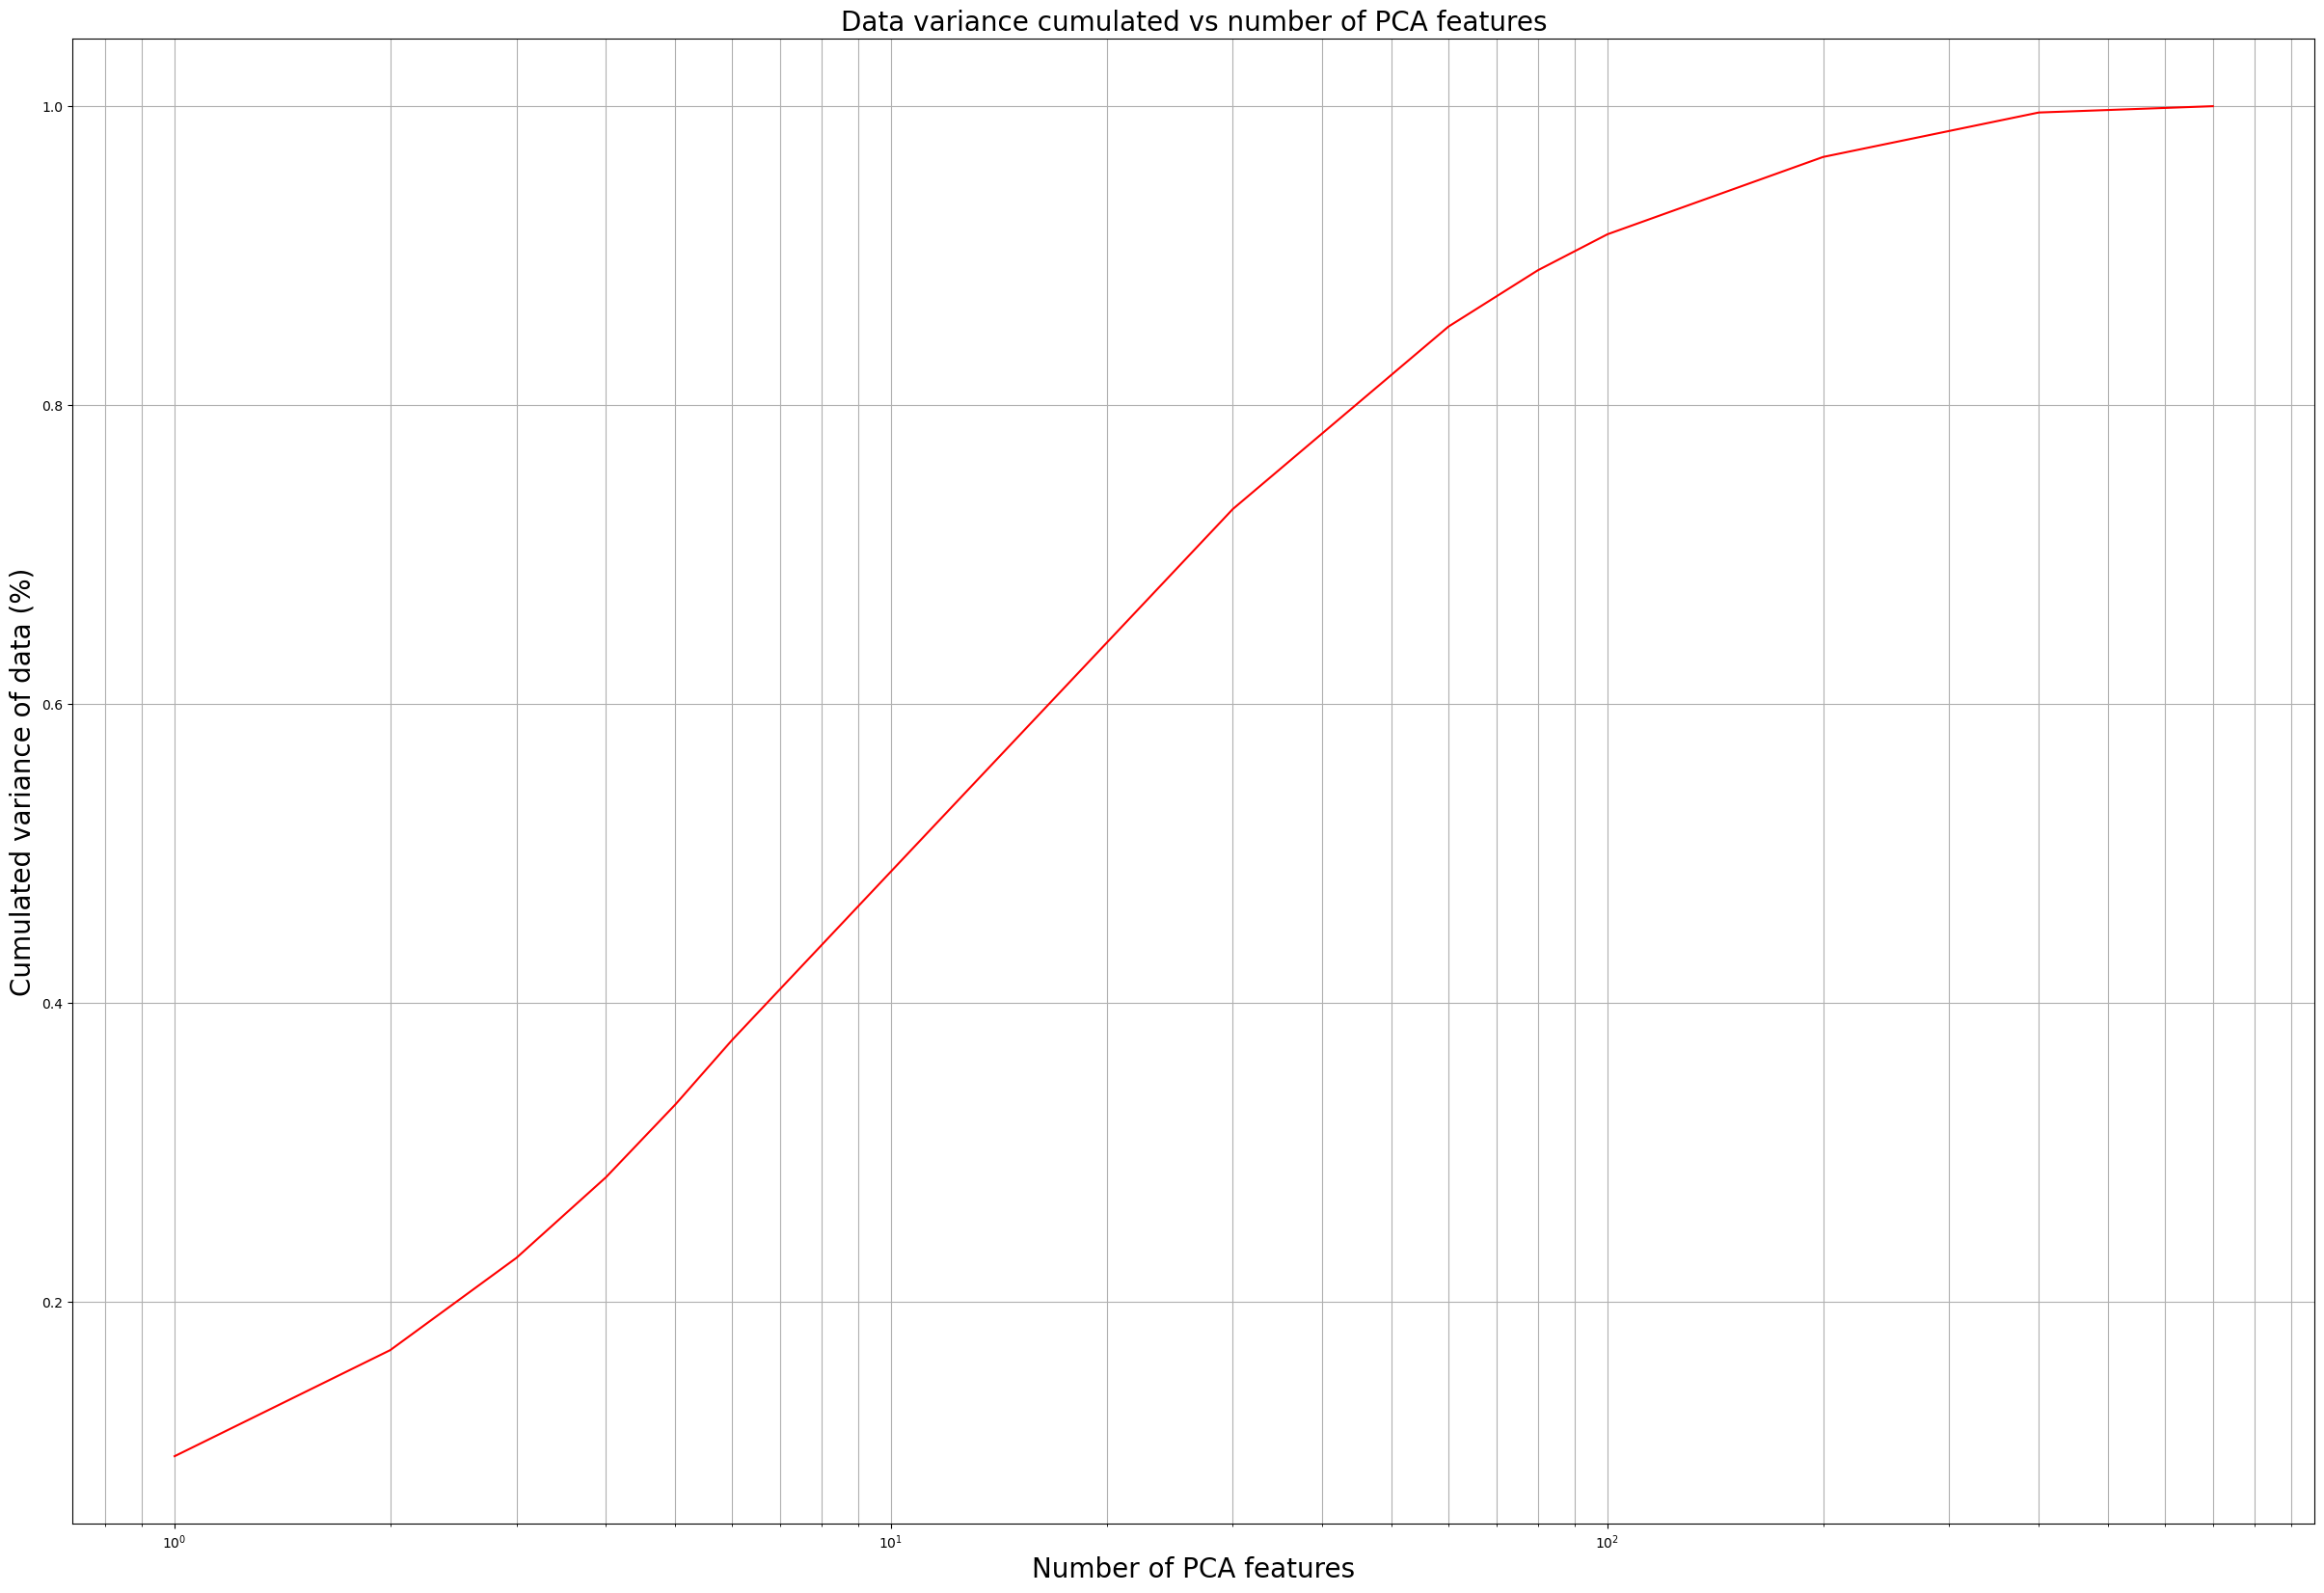

In [21]:
n_components = np.array([1,2,3,4,5,6, 10, 30, 60, 80, 100, 200, 400, 700])
cumul_variance = np.empty(len(n_components))
for i, n in enumerate(n_components):
    pca = PCA(n_components=n)
    pca.fit(train)
    cumul_variance[i] = np.sum(pca.explained_variance_ratio_)

print(cumul_variance)

_ = plt.figure(figsize=(30,20))
_ = plt.grid(which='both')
_ = plt.plot(n_components, cumul_variance, color='red')
_ = plt.xscale('log')
_ = plt.xlabel('Number of PCA features', size=20)
_ = plt.ylabel('Cumulated variance of data (%)', size=20)
_ = plt.title('Data variance cumulated vs number of PCA features', size=20)
plt.savefig('visualizations/cumulated variance_pca features.png')
plt.show()